# ANN, excluding Val-epitopes

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

2025-01-15 09:18:20.515718: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 09:18:20.523072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736950700.531812  103596 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736950700.534440  103596 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 09:18:20.543505: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## dataset

In [2]:
infile = '/home/yuan/results/epitope/epi_top_features.txt'
df = pd.read_csv(infile, sep='\t', header=0, index_col=None)
# balance the number of epitopes and non-epitopes
# shuffle rows
df = df.sample(frac=1)
df.head()

,seq,label,mean_hydro_ph7,mean_hydro,mean_polar,mean_polar_stab,mean_VDWV,median_hydro_ph7,median_hydro,median_polar,...,has_C,has_I,has_L,has_K,has_F,has_P,has_S,has_T,has_Y,has_V
2583095,PNLAISTLY,1,36.777778,1.097778,7.411111,0.148556,3.260000,41.0,1.53,8.00,...,0,1,1,0,0,1,1,1,1,0
3116372,GFLPMLLNVF,1,56.700000,1.321000,6.530000,0.176400,3.688000,86.5,1.53,5.45,...,0,0,1,0,1,1,0,0,0,1
2121215,PLQGQKCGG,0,6.333333,0.656667,8.633333,0.113778,2.424444,0.0,0.07,9.00,...,1,0,1,1,0,1,0,0,0,0
1863493,ESLLFLGLVAAVC,0,56.538462,1.050769,6.830769,0.134385,2.900000,76.0,1.32,5.90,...,1,0,1,0,1,0,1,0,0,1
563526,VTDKLKMTL,1,29.888889,0.935556,8.244444,0.165778,3.661111,13.0,1.15,8.60,...,0,0,1,1,0,0,0,1,0,1


In [3]:
%load_ext autoreload
%autoreload 2

from seq.my_ann import MyAnn

## filter I: without Val

In [4]:
# keep epitopes without Val
feature = 'has_V'
print('entire data:', df.shape)
print('epitopes without Val:', df[(df[feature]==0) & (df['label']==1)].shape)
print('epitopes having Val:', df[(df[feature]==1) & (df['label']==1)].shape)
sub_df = df[~((df[feature]==1) & (df['label']==1))]
print('filtered data:', sub_df.shape)

entire data: (3458238, 50)
epitopes without Val: (757565, 50)
epitopes having Val: (1107677, 50)
filtered data: (2350561, 50)


In [5]:
# prepare 
c = MyAnn()
c.get_xy(sub_df)

X: (2350561, 48) float16
y: (2350561,) float16
labels: Counter({np.float16(0.0): 1592996, np.float16(1.0): 757565})
train data: (1316313, 48) (1316313,)
validate data: (564135, 48) (564135,)
test data (470113, 48) (470113,)


In [6]:
# train model
c.declare_model()
c.train(epochs=10)

I0000 00:00:1736950732.548380  103596 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1179 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,433 (290.75 KB)

 Trainable params: 74,433 (290.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


I0000 00:00:1736950733.921427  103737 service.cc:148] XLA service 0x75d318005940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736950733.921446  103737 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-01-15 09:18:53.943405: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736950734.024530  103737 cuda_dnn.cc:529] Loaded cuDNN version 90300


  189/41135 ━━━━━━━━━━━━━━━━━━━━ 32s 805us/step - accuracy: 0.7052 - auc: 0.7638 - loss: 0.5206 - mse: 0.1794 - precision: 0.5670 - recall: 0.4201  

I0000 00:00:1736950734.564477  103737 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41135/41135 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.7673 - auc: 0.8485 - loss: 0.4239 - mse: 0.1468 - precision: 0.6405 - recall: 0.6350 - val_accuracy: 0.7838 - val_auc: 0.8669 - val_loss: 0.4039 - val_mse: 0.1387 - val_precision: 0.6699 - val_recall: 0.6490
Epoch 2/10
41135/41135 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7823 - auc: 0.8640 - loss: 0.4082 - mse: 0.1400 - precision: 0.6547 - recall: 0.6868 - val_accuracy: 0.7924 - val_auc: 0.8745 - val_loss: 0.3969 - val_mse: 0.1357 - val_precision: 0.6692 - val_recall: 0.7037
Epoch 3/10
41135/41135 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - accuracy: 0.7894 - auc: 0.8707 - loss: 0.4004 - mse: 0.1367 - precision: 0.6608 - recall: 0.7093 - val_accuracy: 0.7944 - val_auc: 0.8767 - val_loss: 0.3923 - val_mse: 0.1337 - val_precision: 0.6737 - val_recall: 0.7020
Epoch 4/10
41135/41135 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.7915 - auc: 0.8728 - loss: 0.3983 - mse: 0.1358 - precision: 0.6646 - recall: 0.7118 - val_accuracy: 0.

,accuracy,auc,loss,mse,precision,recall,val_accuracy,val_auc,val_loss,val_mse,val_precision,val_recall
0,0.772973,0.854464,0.417608,0.144236,0.646436,0.650829,0.783804,0.866934,0.403925,0.138677,0.669893,0.649017
1,0.784961,0.866577,0.405205,0.138779,0.656601,0.696206,0.792376,0.874498,0.396921,0.135670,0.669163,0.703715
2,0.790061,0.871320,0.399829,0.136458,0.661771,0.711669,0.794397,0.876708,0.392296,0.133722,0.673742,0.702015
3,0.791911,0.873157,0.397728,0.135544,0.664688,0.713738,0.795884,0.878740,0.393244,0.134069,0.662853,0.746241
4,0.793055,0.874309,0.396394,0.134950,0.666406,0.715312,0.797302,0.879152,0.389176,0.132304,0.672095,0.724604
5,0.794337,0.875159,0.395453,0.134543,0.668568,0.716322,0.796653,0.880326,0.389700,0.132557,0.657872,0.768972
6,0.794555,0.875813,0.394642,0.134193,0.669079,0.716041,0.797976,0.880812,0.392446,0.133475,0.663429,0.757428
7,0.794770,0.876173,0.394356,0.134046,0.668676,0.718644,0.799080,0.881002,0.387585,0.131675,0.673238,0.731765
8,0.795599,0.876616,0.393706,0.133790,0.670092,0.719241,0.798580,0.881002,0.387658,0.131741,0.666293,0.751356
9,0.795779,0.876902,0.393474,0.133656,0.670368,0.719472,0.799640,0.881945,0.386485,0.131161,0.673284,0.734999


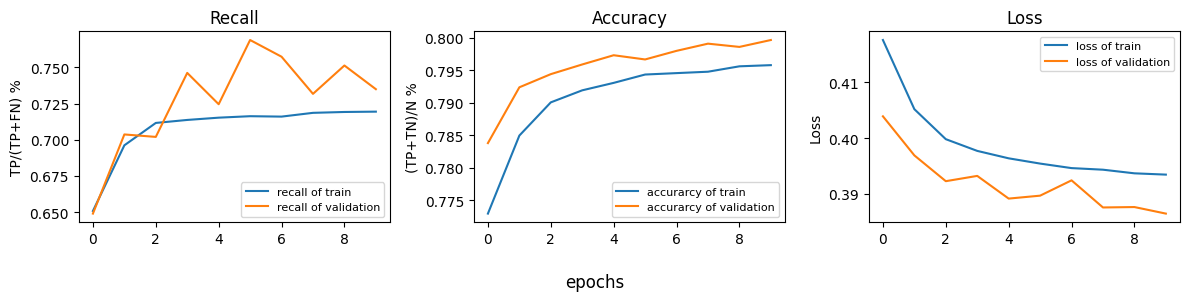

In [7]:
# evaluate model
c.plot_acc_recall()

14692/14692 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8001 - auc: 0.8825 - loss: 0.3863 - mse: 0.1311 - precision: 0.6757 - recall: 0.7369  
{'accuracy': 0.8007649183273315, 'auc': 0.8829920291900635, 'loss': 0.3855383098125458, 'mse': 0.13080927729606628, 'precision': 0.6758446097373962, 'recall': 0.7371237277984619}
14692/14692 ━━━━━━━━━━━━━━━━━━━━ 7s 441us/step
[[0.        ]
 [0.66206056]
 [0.46240565]]


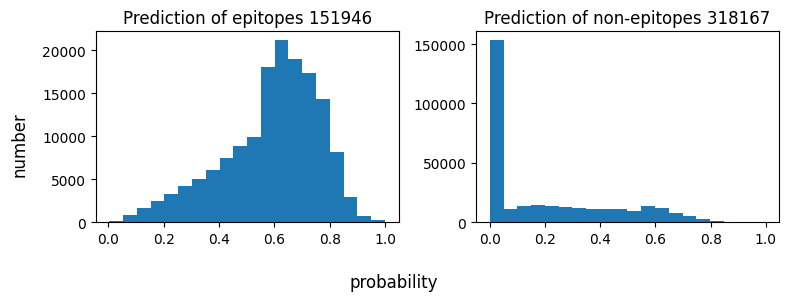

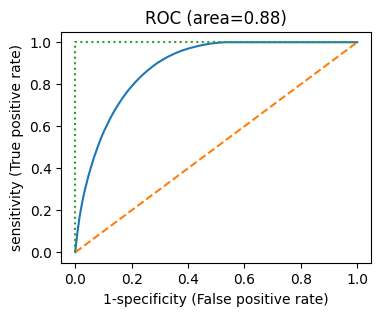

In [8]:
# evaluate model using test data
c.test()
c.plot_prob()
c.plot_roc()

In [10]:
# save entire model
c.save_model('../models/epitopes_ann_notVal.keras')

<Sequential name=sequential, built=True>

## filter II: having Val

In [11]:
# keep epitopes contain Val
feature = 'has_V'
print('entire data:', df.shape)
print('epitopes without Val:', df[(df[feature]==0) & (df['label']==1)].shape)
print('epitopes having Val:', df[(df[feature]==1) & (df['label']==1)].shape)
sub_df = df[~((df[feature]==0) & (df['label']==1))]
print('filtered data:', sub_df.shape)

entire data: (3458238, 50)
epitopes without Val: (757565, 50)
epitopes having Val: (1107677, 50)
filtered data: (2700673, 50)


In [12]:
# prepare 
c = MyAnn()
c.get_xy(sub_df)

X: (2700673, 48) float16
y: (2700673,) float16
labels: Counter({np.float16(0.0): 1592996, np.float16(1.0): 1107677})
train data: (1512376, 48) (1512376,)
validate data: (648162, 48) (648162,)
test data (540135, 48) (540135,)


In [13]:
# train model
c.declare_model()
c.train(epochs=10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,433 (290.75 KB)

 Trainable params: 74,433 (290.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
47262/47262 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.7721 - auc: 0.8589 - loss: 0.4214 - mse: 0.1455 - precision: 0.6768 - recall: 0.8484 - val_accuracy: 0.7884 - val_auc: 0.8744 - val_loss: 0.4049 - val_mse: 0.1385 - val_precision: 0.6930 - val_recall: 0.8680
Epoch 2/10
47262/47262 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.7858 - auc: 0.8717 - loss: 0.4076 - mse: 0.1395 - precision: 0.6914 - recall: 0.8630 - val_accuracy: 0.7918 - val_auc: 0.8776 - val_loss: 0.4002 - val_mse: 0.1365 - val_precision: 0.7038 - val_recall: 0.8492
Epoch 3/10
47262/47262 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.7888 - auc: 0.8743 - loss: 0.4050 - mse: 0.1383 - precision: 0.6961 - recall: 0.8620 - val_accuracy: 0.7936 - val_auc: 0.8799 - val_loss: 0.3990 - val_mse: 0.1359 - val_precision: 0.7211 - val_recall: 0.8091
Epoch 4/10
47262/47262 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.7908 - auc: 0.8764 - loss: 0.4024 - mse: 0.1372 - precision: 0.6996 - recall: 0.8603 - 

,accuracy,auc,loss,mse,precision,recall,val_accuracy,val_auc,val_loss,val_mse,val_precision,val_recall
0,0.778263,0.865036,0.414799,0.142687,0.682638,0.858961,0.788440,0.874420,0.404915,0.138547,0.693045,0.868037
1,0.786673,0.872427,0.406855,0.139141,0.692382,0.863976,0.791817,0.877559,0.400172,0.136494,0.703809,0.849195
2,0.789529,0.874932,0.404083,0.137895,0.696821,0.862224,0.793623,0.879895,0.398960,0.135922,0.721145,0.809086
3,0.790828,0.876325,0.402453,0.137187,0.699388,0.859812,0.795999,0.881023,0.395888,0.134689,0.708894,0.851827
4,0.791695,0.877126,0.401574,0.136768,0.701010,0.858541,0.792561,0.881475,0.397013,0.135258,0.686512,0.908484
5,0.792467,0.877639,0.400937,0.136494,0.702071,0.858592,0.796370,0.882087,0.394785,0.134217,0.703303,0.869920
6,0.792786,0.878046,0.400485,0.136264,0.702539,0.858530,0.793292,0.882374,0.397162,0.135292,0.689004,0.903016
7,0.793615,0.878595,0.399998,0.136032,0.703988,0.857674,0.797611,0.882805,0.393842,0.133732,0.717961,0.833317
8,0.793777,0.878937,0.399503,0.135835,0.704014,0.858278,0.797924,0.883267,0.393148,0.133461,0.708266,0.861630
9,0.794012,0.879221,0.399017,0.135622,0.704340,0.858288,0.797262,0.883532,0.393260,0.133588,0.701231,0.880080


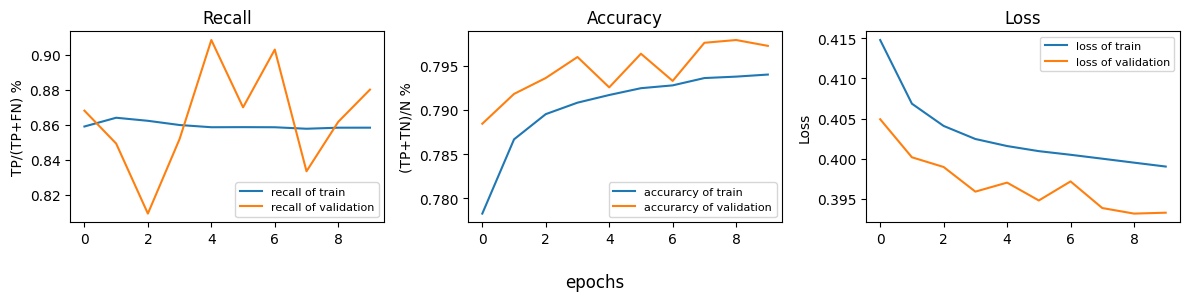

In [14]:
# evaluate model
c.plot_acc_recall()

16880/16880 ━━━━━━━━━━━━━━━━━━━━ 17s 988us/step - accuracy: 0.7972 - auc: 0.8837 - loss: 0.3934 - mse: 0.1336 - precision: 0.7010 - recall: 0.8802
{'accuracy': 0.796673059463501, 'auc': 0.8831831812858582, 'loss': 0.39400559663772583, 'mse': 0.13386191427707672, 'precision': 0.7008816599845886, 'recall': 0.8797842860221863}
16880/16880 ━━━━━━━━━━━━━━━━━━━━ 7s 433us/step 
[[0.69022274]
 [0.11492074]
 [0.7138365 ]]


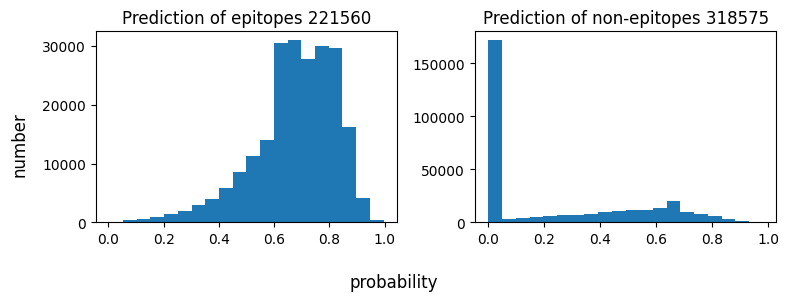

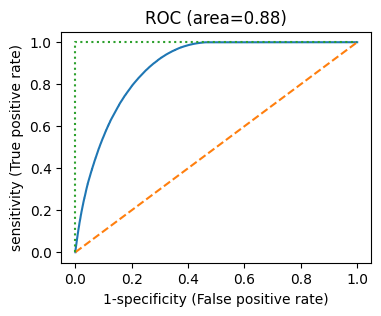

In [15]:
# evaluate model using test data
c.test()
c.plot_prob()
c.plot_roc()

In [16]:
# save entire model
c.save_model('../models/epitopes_ann_hasVal.keras')

<Sequential name=sequential_1, built=True>